In [ ]:
# so in this notebook iam trying to solve the 
# problem of overfitting by adding some regularization techniques
# Image Augmentation and Dropout 

In [ ]:
 import tensorflow as tf
 

In [ ]:
#import basic libs
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#import ImageDatagerator to prepocess the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# donload the data from source
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# this will return the path to the file on computer
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 0s 0us/step


In [ ]:
# lets create and access the data now
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


print('Cats in training are {}'.format(num_cats_tr))
print('Dogs in training are {}'.format(num_dogs_tr))
print('Cats in Validation are {}'.format(num_cats_val))
print('Dogs in Validation are {}'.format(num_dogs_val))


print('Total cats: {}'.format( num_cats_tr + num_cats_val))
print('Total dogs: {}'.format( num_dogs_tr + num_dogs_val))


Cats in training are 1000
Dogs in training are 1000
Cats in Validation are 500
Dogs in Validation are 500
Total cats: 1500
Total dogs: 1500


In [ ]:
BATCH_SIZE = 100 
TARGET_SHAPE = 150


In [ ]:
# this will plot the five images in a single row
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
# lets to some image augmentation 

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip = True) # flip the image horizonntally

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (TARGET_SHAPE, TARGET_SHAPE))

Found 2000 images belonging to 2 classes.


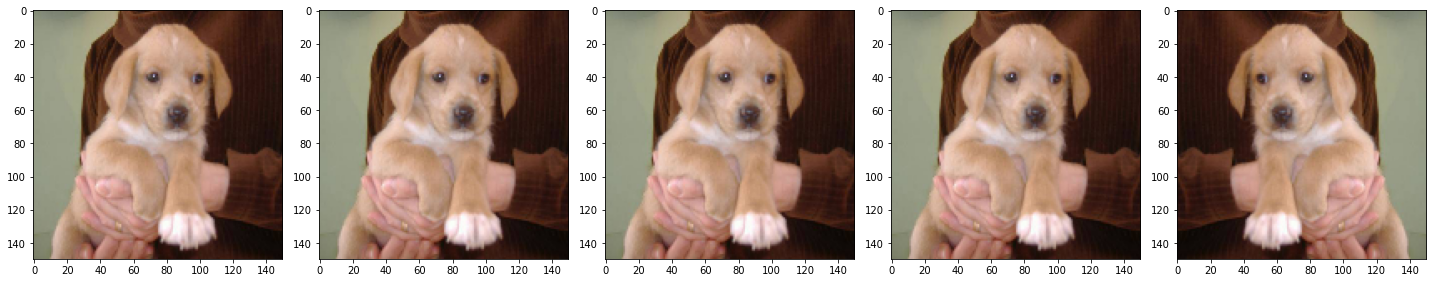

In [ ]:
augemented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augemented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, vertical_flip = True) # flip the image vertically

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (TARGET_SHAPE, TARGET_SHAPE))

Found 2000 images belonging to 2 classes.


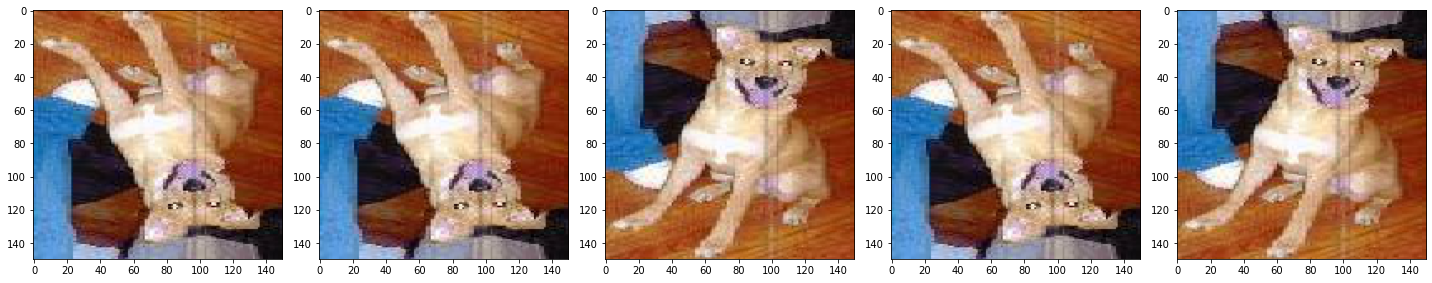

In [ ]:
augemented_images = [train_data_gen[0][0][0] for i in range(5)] 
plotImages(augemented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range= 45) # align to 45 degree angle

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (TARGET_SHAPE, TARGET_SHAPE))

Found 2000 images belonging to 2 classes.


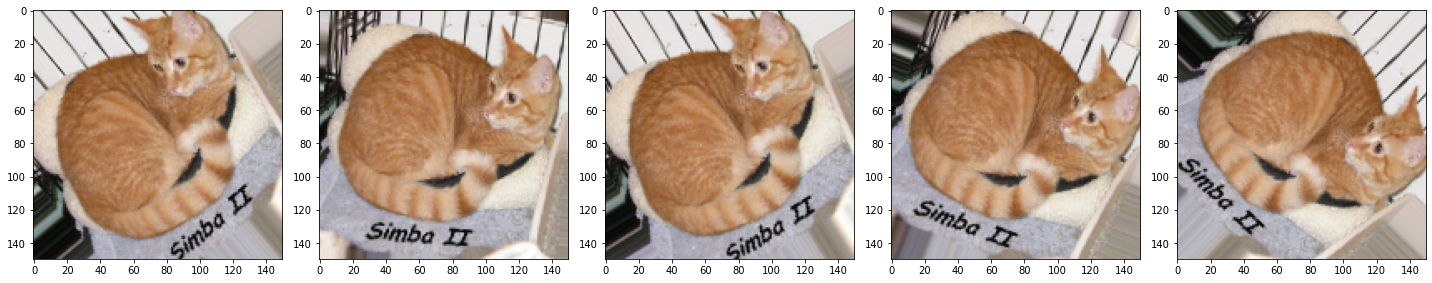

In [ ]:
augemented_images = [train_data_gen[0][0][0] for i in range(5)] 
plotImages(augemented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range= 0.45) # align to 45 degree angle

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (TARGET_SHAPE, TARGET_SHAPE))

Found 2000 images belonging to 2 classes.


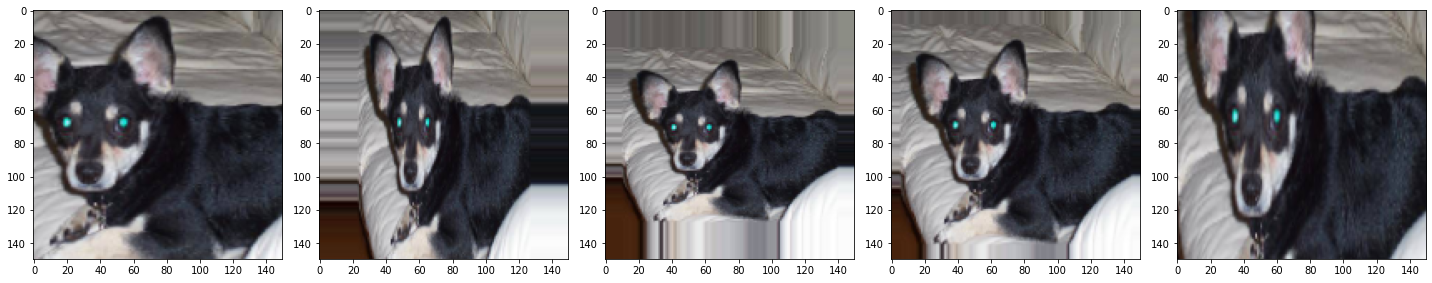

In [ ]:
augemented_images = [train_data_gen[0][0][0] for i in range(5)] 
plotImages(augemented_images)

In [ ]:
# lets add the transforamtion at once
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (TARGET_SHAPE, TARGET_SHAPE),
                                               class_mode='binary')



Found 2000 images belonging to 2 classes.


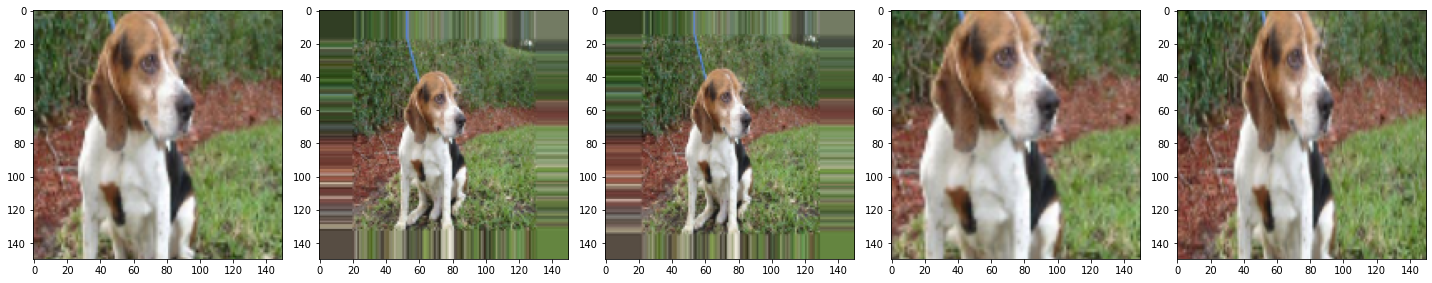

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255) # we wanna keep the validation set to its original form as thats the data
                                                   # our model is gonna see
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                 class_mode='binary')



Found 1000 images belonging to 2 classes.


In [ ]:
# create the model with dropout to rationalize the model
'''model = tf.keras.models.Sequential([ 
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),     

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(2)
])
'''

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
epochs = 100


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/100
20/20 [==============================] - 18s 797ms/step - loss: 0.7206 - accuracy: 0.4750 - val_loss: 0.6929 - val_accuracy: 0.5750
Epoch 2/100
20/20 [==============================] - 16s 807ms/step - loss: 0.6926 - accuracy: 0.5140 - val_loss: 0.6900 - val_accuracy: 0.5020
Epoch 3/100
20/20 [==============================] - 16s 812ms/step - loss: 0.6934 - accuracy: 0.4935 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 16s 799ms/step - loss: 0.6934 - accuracy: 0.5200 - val_loss: 0.6906 - val_accuracy: 0.5030
Epoch 5/100
20/20 [==============================] - 16s 811ms/step - loss: 0.6928 - accuracy: 0.4900 - val_loss: 0.6909 - val_accuracy: 0.5080
Epoch 6/100
20/20 [==============================] - 16s 801ms/step - loss: 0.6919 - accuracy: 0.4900 - val_loss: 0.6927 - val_accuracy: 0.5030
Epoch 7/100
20/20 [==============================] - 16s 802ms/step - loss: 0.6936 - accuracy: 0.5025 - val_loss: 0.6926 - val_accuracy:

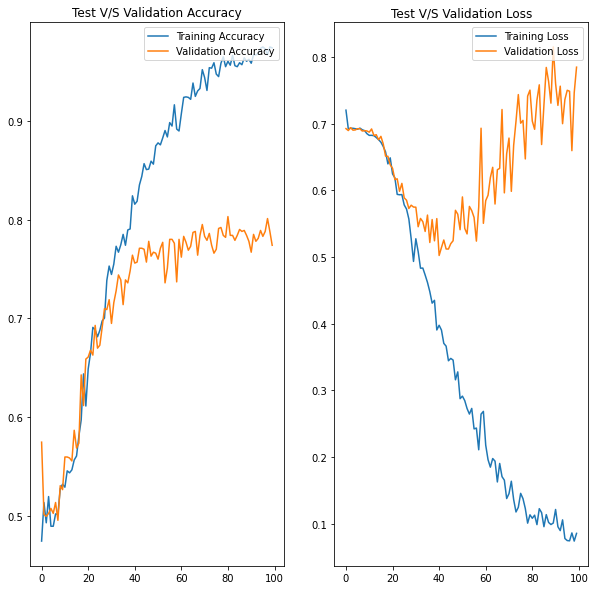

In [60]:
#plot the loss and the accuracy for test and validation data set
acuuracy = history.history['accuracy']
acuuracy_val = history.history['val_accuracy']

loss = history.history['loss']
loss_val = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acuuracy , label='Training Accuracy')
plt.plot(epochs_range, acuuracy_val,  label='Validation Accuracy')
plt.title('Test V/S Validation Accuracy')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss , label='Training Loss')
plt.plot(epochs_range, loss_val,  label='Validation Loss')
plt.title('Test V/S Validation Loss')
plt.legend(loc='upper right')

This plots represents how accuracy for testing and validation set are improving till 40-50 epochs and then model seems to memorise the data, but it is not certainly overfitting the data as such. We can limit our epochs to 40-50 and it stills yeild the good accuracy and loss 